In [2]:
#### This is the code for project2 part I generate and analyze red noise time series
## import module needed
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [79]:
## (a) generate four red noise time series and plot
SizeS=5000 #size of time series
t = np.arange(0,SizeS,1)
auto_vec = np.array([0, .25, .5, .92])
Series = np.empty((np.size(t),4))
for ia,a in enumerate(auto_vec):
    b = np.sqrt(1. - a**2)
    Series[0,ia] = np.random.normal(0.,1.,size=1)    
    for it,tval in enumerate(t[1:]):
        Series[it+1,ia] = a*Series[it,ia] + b*np.random.normal(size=1)
    mean=np.mean(Series[:,ia])
    std=np.std(Series[:,ia])
    for iv,val in enumerate(Series[:,ia]):
        Series[iv,ia]=(val-mean)/std
    mean2=np.mean(Series[:,ia])   #check standardizing result
    std2=np.std(Series[:,ia])
    print('mean of series',ia+1,':   ',np.str(np.round(mean2,2)))
    print('sd of series',ia+1,':     ',np.str(np.round(std2,2)))

mean of series 1 :    0.0
sd of series 1 :      1.0
mean of series 2 :    -0.0
sd of series 2 :      1.0
mean of series 3 :    -0.0
sd of series 3 :      1.0
mean of series 4 :    0.0
sd of series 4 :      1.0


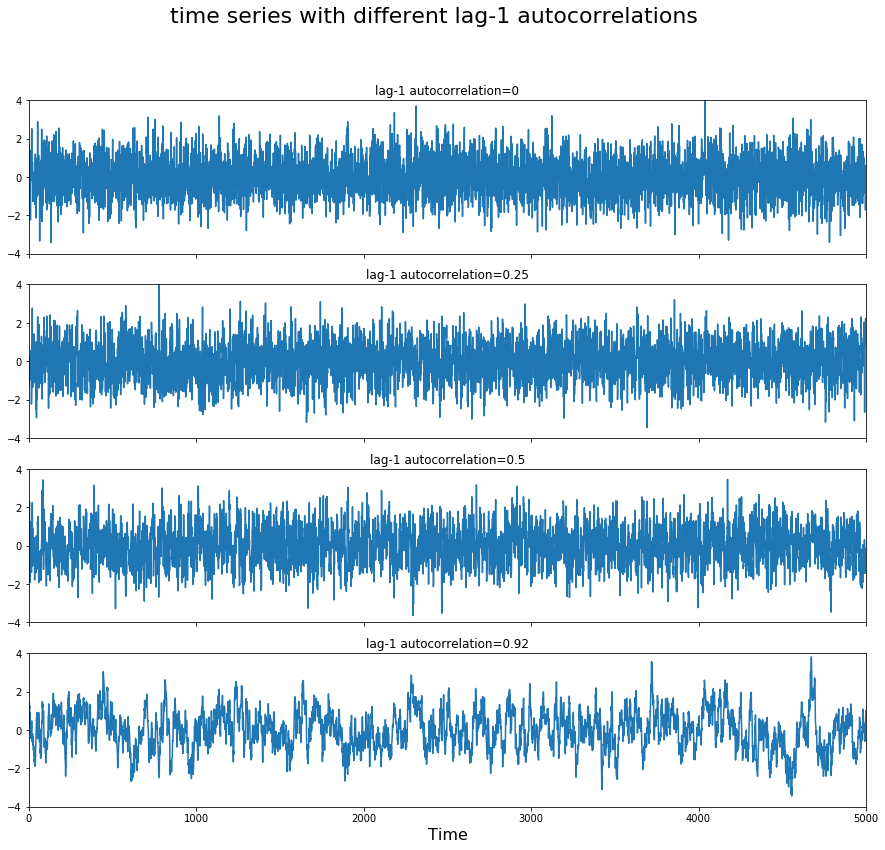

In [52]:
## plot four series
fig1, ax = plt.subplots(4, 1,sharex=True)
fig1.set_figheight(13)
fig1.set_figwidth(15)
ax[0].plot(np.arange(0,np.size(t)),Series[:,0],'-')
ax[0].set_title('lag-1 autocorrelation=0')
ax[1].plot(np.arange(0,np.size(t)),Series[:,1],'-')
ax[1].set_title('lag-1 autocorrelation=0.25')
ax[2].plot(np.arange(0,np.size(t)),Series[:,2],'-')
ax[2].set_title('lag-1 autocorrelation=0.5')
ax[3].plot(np.arange(0,np.size(t)),Series[:,3],'-')
ax[3].set_title('lag-1 autocorrelation=0.92')
ax[3].set_xlabel('Time',fontsize=16)
plt.setp(ax, xlim=(0,5000),ylim=(-4,4))
fig1.suptitle('time series with different lag-1 autocorrelations', fontsize = 22);

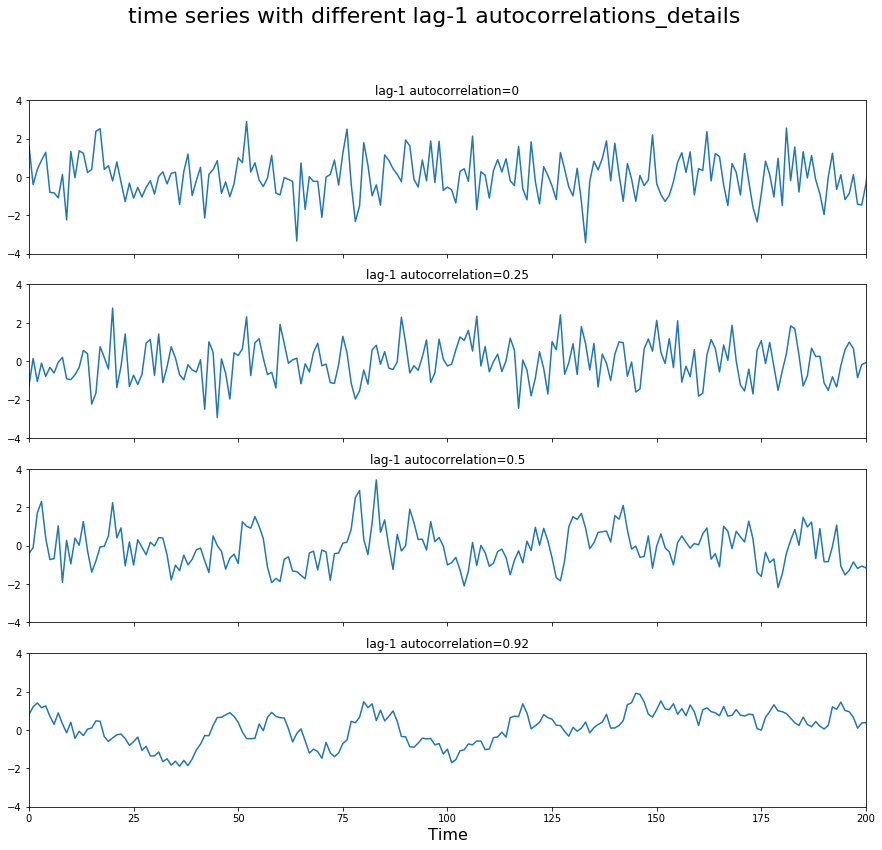

In [51]:
## plot details
fig2, ax = plt.subplots(4, 1,sharex=True)
fig2.set_figheight(13)
fig2.set_figwidth(15)
ax[0].plot(np.arange(0,np.size(t)),Series[:,0],'-')
ax[0].set_title('lag-1 autocorrelation=0')
ax[1].plot(np.arange(0,np.size(t)),Series[:,1],'-')
ax[1].set_title('lag-1 autocorrelation=0.25')
ax[2].plot(np.arange(0,np.size(t)),Series[:,2],'-')
ax[2].set_title('lag-1 autocorrelation=0.5')
ax[3].plot(np.arange(0,np.size(t)),Series[:,3],'-')
ax[3].set_title('lag-1 autocorrelation=0.92')
ax[3].set_xlabel('Time',fontsize=16)
plt.setp(ax, xlim=(0,200),ylim=(-4,4))
fig2.suptitle('time series with different lag-1 autocorrelations_details', fontsize = 22);

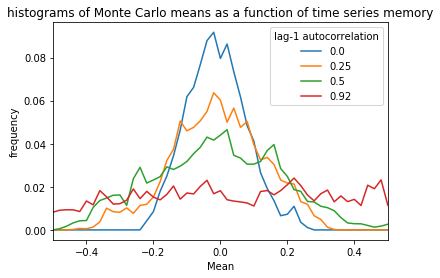

In [82]:
## (b) get and analyze random samples (size=SampleN), and repeat for RepeatN times
RepeatN=100000
SampleN=100
SampleMean=np.empty((RepeatN,4))
SampleStd=np.empty((RepeatN,4))
for repeat in range(RepeatN):
    pick=np.random.randint(0,SizeS-SampleN)
    Sample=np.empty((SampleN,4))
    for ib,bval in enumerate(Sample[0,:]):
        Sample[:,ib]=Series[pick:pick+SampleN,ib]
        SampleMean[repeat,ib]=np.mean(Sample[:,ib])
        SampleStd[repeat,ib]=np.std(Sample[:,ib])

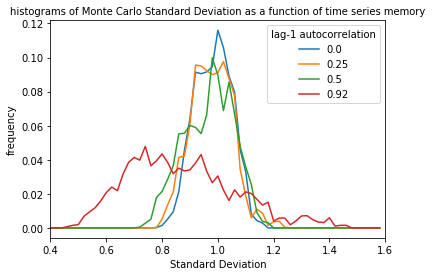

In [90]:
## plot histograms of stds
xinc = np.arange(0.4,1.6,0.02)
iplot = 0
hx = np.histogram(SampleStd[:,iplot],xinc)
plt.plot(hx[1][:-1],hx[0]/float(np.size(SampleStd,axis = 0)),'-')
iplot = 1
hx = np.histogram(SampleStd[:,iplot],xinc)
plt.plot(hx[1][:-1],hx[0]/float(np.size(SampleStd,axis = 0)),'-')
iplot = 2
hx = np.histogram(SampleStd[:,iplot],xinc)
plt.plot(hx[1][:-1],hx[0]/float(np.size(SampleStd,axis = 0)),'-')
iplot = 3
hx = np.histogram(SampleStd[:,iplot],xinc)
plt.plot(hx[1][:-1],hx[0]/float(np.size(SampleStd,axis = 0)),'-')

plt.xlabel('Standard Deviation')
plt.ylabel('frequency')    
plt.legend(np.ndarray.tolist(auto_vec), title = 'lag-1 autocorrelation');
plt.title('histograms of Monte Carlo Standard Deviation as a function of time series memory', fontsize = 10);
plt.xlim(0.4,1.6);

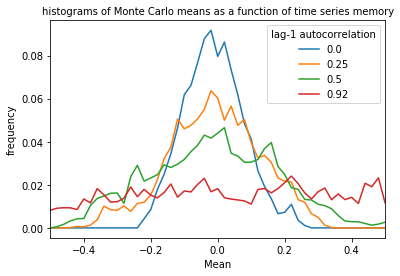

In [89]:
## plot histograms of means
xinc = np.arange(-1.,1.,0.02)
iplot = 0
hx = np.histogram(SampleMean[:,iplot],xinc)
plt.plot(hx[1][:-1],hx[0]/float(np.size(SampleMean,axis = 0)),'-')
iplot = 1
hx = np.histogram(SampleMean[:,iplot],xinc)
plt.plot(hx[1][:-1],hx[0]/float(np.size(SampleMean,axis = 0)),'-')
iplot = 2
hx = np.histogram(SampleMean[:,iplot],xinc)
plt.plot(hx[1][:-1],hx[0]/float(np.size(SampleMean,axis = 0)),'-')
iplot = 3
hx = np.histogram(SampleMean[:,iplot],xinc)
plt.plot(hx[1][:-1],hx[0]/float(np.size(SampleMean,axis = 0)),'-')
   
plt.xlabel('Mean')
plt.ylabel('frequency')    
plt.legend(np.ndarray.tolist(auto_vec), title = 'lag-1 autocorrelation');
plt.title('histograms of Monte Carlo means as a function of time series memory', fontsize = 10);
plt.xlim(-.5,.5);

In [99]:
## (c) calculate the number independent samples (N*) using Barnes Chapter 2 Equation (88)
InD_N = np.empty((4))
for index,autocorr in enumerate(auto_vec):
    InD_N[index]=(1-autocorr)/(1+autocorr)*SampleN
    print('Time series',index+1,',lag-1 autoCorr=',autocorr,':    InD_N=',np.str(np.round(InD_N[index],0)))

Time series 1 ,lag-1 autoCorr= 0.0 :    InD_N= 100.0
Time series 2 ,lag-1 autoCorr= 0.25 :    InD_N= 60.0
Time series 3 ,lag-1 autoCorr= 0.5 :    InD_N= 33.0
Time series 4 ,lag-1 autoCorr= 0.92 :    InD_N= 4.0
